In [165]:
%matplotlib inline

In [166]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import os

In [167]:
#file to load for city and ride data from csv
city_data_to_load = os.path.join("Resources", "city_data.csv")
ride_data_to_load = os.path.join("Resources", "ride_data.csv")


In [168]:
#read the csv file as data frame lets do city data first
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [169]:
#read ride data from csv file to dataframe
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [170]:
#get the columns and rows that are not null in city data
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [171]:
#get the columns and rows that are null in city data
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [172]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [173]:
#get the columns and rows that are null in ride data
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [174]:
#get unique city types
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [175]:
#get the number of data points for Urban
sum(city_data_df["type"] == 'Urban')

66

In [176]:
types_of_cities = city_data_df["type"].unique()
city_sum = {}
for city_type in types_of_cities:
    city_sum[city_type] = sum(city_data_df["type"] == city_type)
city_sum

{'Urban': 66, 'Suburban': 36, 'Rural': 18}

In [177]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [178]:
#merge ride and city data to get a consolidated view
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on =["city"])

#display the dataframe
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [179]:
#create a dataframe for urban cities
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [180]:
#create a dataframe for suburban and rural cities
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head(1)

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural


In [181]:
#Get the number of rides for urban cities
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [182]:
#Get the number of rides for suburban and rural cities
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [183]:
#get the average fare for each urban cities
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()


city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [184]:
#get the average fare for each suburban and rural cities
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [185]:
#get the average number of drivers for each urban cities
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [186]:
#get the average number of drivers for each suburban and rural cities
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]


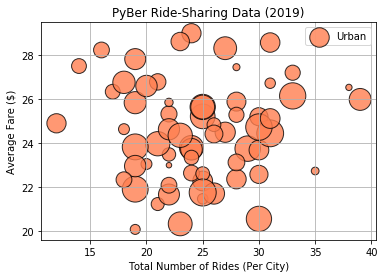

In [187]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_driver_count, 
            c="coral", edgecolor="black", linewidths=1, alpha=0.8, label="Urban")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)
plt.legend()

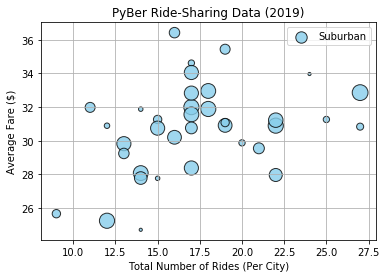

In [188]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_driver_count,
           c="skyblue", edgecolor="black", linewidths=1, alpha=0.8, label="Suburban")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)
plt.legend()

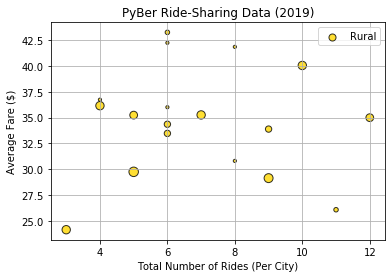

In [189]:
# Build the scatter plots for Rural cities.
plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count,
           c="gold", edgecolor="black", linewidths=1, alpha=0.8, label="Rural")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)

plt.legend()

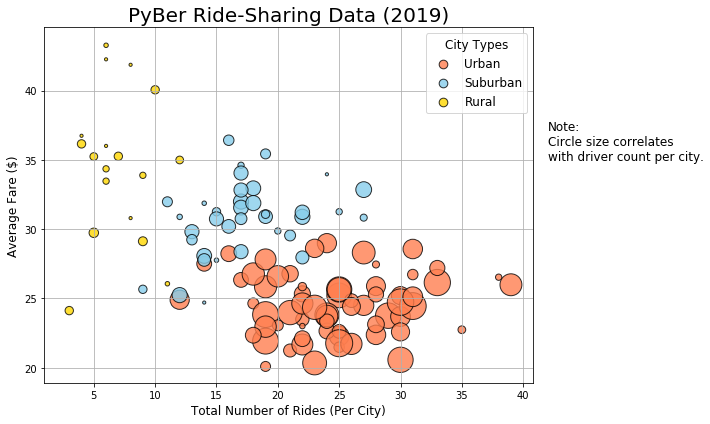

In [195]:
#Add all the scattered charts for each type of city
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_driver_count, 
            c="coral", edgecolor="black", linewidths=1, alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_driver_count,
           c="skyblue", edgecolor="black", linewidths=1, alpha=0.8, label="Suburban")


plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count,
           c="gold", edgecolor="black", linewidths=1, alpha=0.8, label="Rural")


#add the headers and labels with legends
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.grid(True)


#Add the legend
plt.legend()

#create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
                 scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

lgnd.get_title().set_fontsize(12)

plt.text(42, 35, "Note:\nCircle size correlates\nwith driver count per city.", fontsize="12")

#set the layout to be tight
plt.tight_layout()
# Save the figure.
plt.savefig("analysis/Fig1.png")

#show the plot
plt.show()


In [196]:
#get the summary statistics
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [197]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [198]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [199]:
# Get summary statistics.
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [200]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [201]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [202]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [203]:
urban_ride_count.median()

24.0

In [204]:
# Calculate the mode of the ride count for the urban cities.
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [207]:
suburban_ride_count.mode()

0    17
dtype: int64

In [208]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [218]:
#calculate the measures of central tendency for the ride count for the urban city
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count =np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count =sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


In [219]:
mode_suburban_ride_count =sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mode for the ride counts for suburban trips is ModeResult(mode=array([17]), count=array([7])).


In [220]:
mode_rural_ride_count =sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mode for the ride counts for rural trips is ModeResult(mode=array([6]), count=array([5])).


In [222]:
#get teh fares for urban cities
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [224]:
#calculate the measure of central tendency for the average fare for the urban cities
mean_urban_fare = np.mean(urban_fares)
print(f"The mean fare for urban trip is ${mean_urban_fare:.2f}.")

median_urban_fare = np.median(urban_fares)
print(f"The median fare for urban trip is ${median_urban_fare:.2f}")

mode_urban_fare = sts.mode(urban_fares)
print(f"The mode fare for urban trip is {mode_urban_fare}")

The mean fare for urban trip is $24.53.
The median fare for urban trip is $24.64
The mode fare for urban trip is ModeResult(mode=array([22.86]), count=array([5]))


In [260]:
#get the fares for suburban and rural cities
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]

In [225]:
#average fare for suburan and rural cities
mean_suburban_fare = np.mean(suburban_cities_df["fare"])
print(f"The mean fare for suburban trip is ${mean_suburban_fare:.2f}.")

mean_rural_fare = np.mean(rural_cities_df["fare"])
print(f"The mean fare for rural trip is ${mean_rural_fare:.2f}.")

The mean fare for suburban trip is $30.97.
The mean fare for rural trip is $34.62.


In [226]:
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [227]:
#get the driver count data for suburban and rural cities
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']

In [237]:
#calculate the measure of central tendency for the average driver count for the urban cities
mean_urban_drivers = np.mean(urban_drivers)
print(f"The average drivers for urban city is {mean_urban_drivers:.0f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median drivers for urban city is {median_urban_drivers:.0f}")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode drivers for urban city is {mode_urban_drivers}")

The average drivers for urban city is 37.
The median drivers for urban city is 37
The mode drivers for urban city is ModeResult(mode=array([39]), count=array([86]))


In [238]:
#calculate the measure of central tendency for the average driver count for the suburban cities
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The average drivers for suburban city is {mean_suburban_drivers:.0f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median drivers for suburban city is {median_suburban_drivers:.0f}")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode drivers for urban city is {mode_suburban_drivers}")

The average drivers for suburban city is 14.
The median drivers for suburban city is 16
The mode drivers for urban city is ModeResult(mode=array([20]), count=array([79]))


In [239]:
#calculate the measure of central tendency for the average driver count for the rural cities
mean_rural_drivers = np.mean(rural_drivers)
print(f"The average drivers for rural city is {mean_rural_drivers:.0f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median drivers for rural city is {median_rural_drivers:.0f}")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode drivers for rural city is {mode_rural_drivers}")

The average drivers for rural city is 4.
The median drivers for rural city is 4
The mode drivers for rural city is ModeResult(mode=array([1]), count=array([32]))


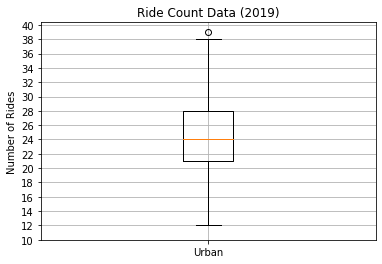

In [250]:
#create box-and-whisker plot for urban ride count
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
#adding title, y-axis label and grid
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10,41, step=2.0))
ax.grid()
plt.show()

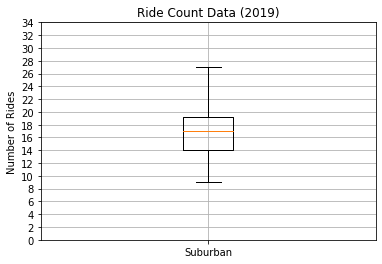

In [251]:
#create box-and-whisker plot for suburban ride count
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)
#adding title, y-axis label and grid
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(0,36, step=2.0))
ax.grid()
plt.show()

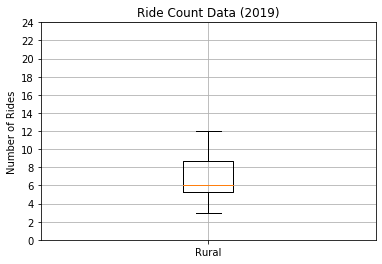

In [252]:
#create box-and-whisker plot for rural ride count
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)
#adding title, y-axis label and grid
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(0,25, step=2.0))
ax.grid()
plt.show()

In [247]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [248]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [249]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

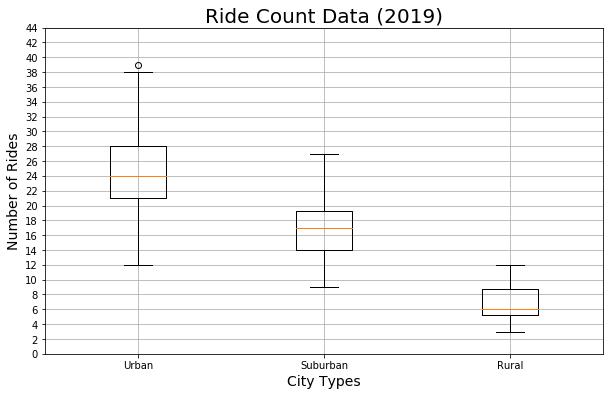

In [254]:
#create box-and-whisker plot for all city ride count
x_labels = ["Urban","Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(ride_count_data, labels=x_labels)
#adding title, y-axis label and grid
ax.set_title("Ride Count Data (2019)", fontsize=20)
ax.set_ylabel('Number of Rides', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.set_yticks(np.arange(0,45, step=2.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [258]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


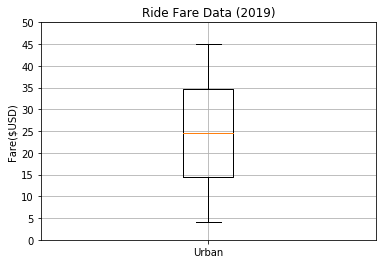

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [263]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

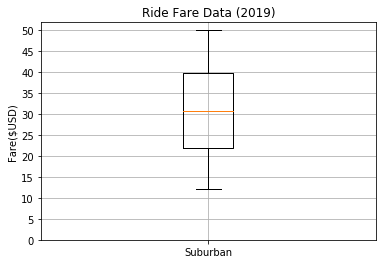

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [266]:
# Create a box-and-whisker plot for the suburban fare data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

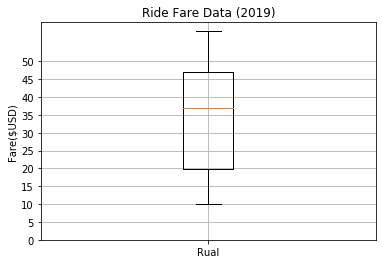

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [265]:
# Create a box-and-whisker plot for the rural fare data.
x_labels = ["Rual"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

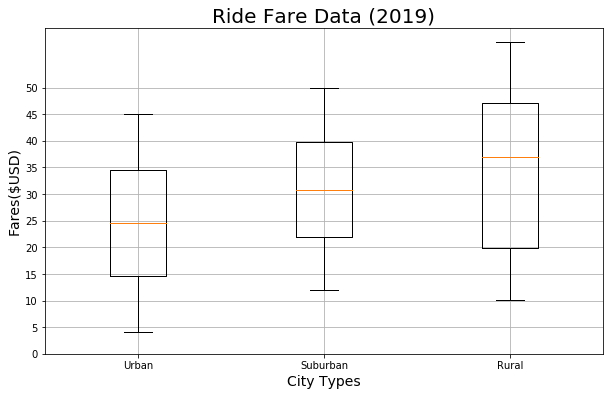

In [267]:
#create box-and-whisker for urban fare data
x_labels = ["Urban", "Suburban", "Rural"]
fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(fare_data, labels=x_labels)
#adding title, y-axis label and grid
ax.set_title("Ride Fare Data (2019)", fontsize=20)
ax.set_ylabel('Fares($USD)', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.set_yticks(np.arange(0,51, step=5.0))
ax.grid()
#save the figure
plt.savefig("analysis/Fig3.png")
plt.show()

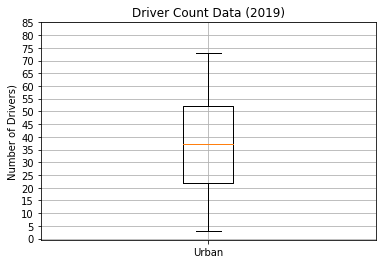

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [268]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

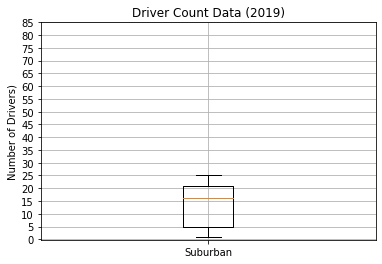

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [269]:
# Create the box-and-whisker plot for the suburban driver count data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_drivers.describe()

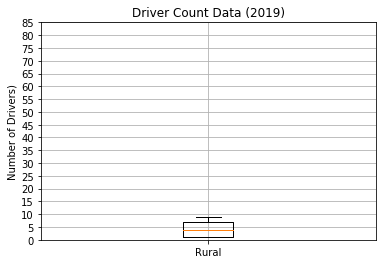

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [270]:
# Create the box-and-whisker plot for the rural driver count data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_drivers.describe()

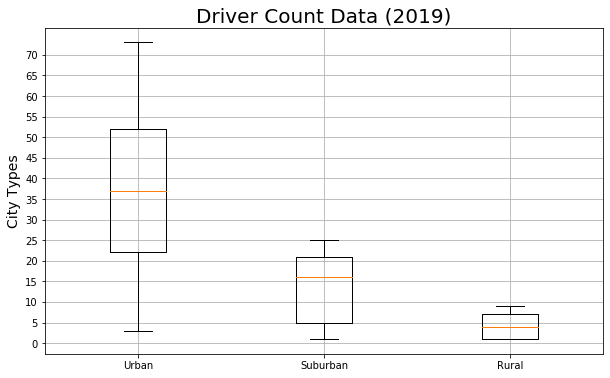

In [272]:
# Create the box-and-whisker plot for the suburban driver count data.
x_labels = ["Urban","Suburban", "Rural"]
drivers_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(drivers_data,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Drivers)', fontsize=14)
ax.set_ylabel('City Types', fontsize=14)
ax.set_yticks(np.arange(0, 75, step=5.0))
ax.grid()
#save the figure
plt.savefig("analysis/Fig4.png")
plt.show()